In [1]:
from purkinje.models import Purkinje
from purkinje.utils import ensure_dir
from purkinje.visualize import plot_raster, plot_avg_fr
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
import numpy as np

# Simulation 4: Double pause

Here, we show how the cell can learn multiple pauses by interleaving different ISIs across trials. 

## Set parameters and train. 

In [2]:
# Acquisition

acq_trials=800
CS_onsets=[0.0, 0.0]
CS_offsets=[.22, .52]
US_onsets=[.2,.5] # Parameters for double pause are controlled here. 
US_offsets=[.3,.6] # And here. 
probe_start = 50
probe_per   = 5
ITI=30
CS_freq=50
US_freq = 500

pk = Purkinje(a=4500) # Increasing a saves time for processing. :eave out this variable to match parameters from other simulations. 
pk.run(CS_onsets=CS_onsets, CS_offsets=CS_offsets, US_onsets=US_onsets, US_offsets=US_offsets,
       ITI=ITI, CS_freq=CS_freq, US_freq=US_freq,trials=acq_trials, probe_start=probe_start,
       probe_per=probe_per, multiple=True, verbose=0)



## Plot double pause. 

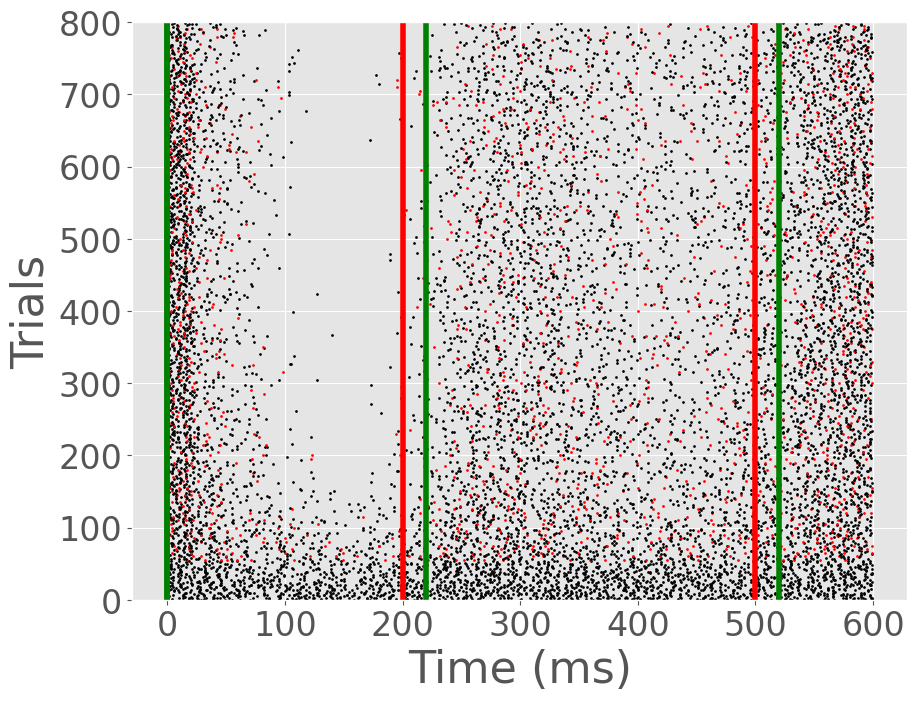

In [3]:
# Rasters
fig_save_dir = '../figures'
ensure_dir(fig_save_dir)

raster = np.array(pk.all_rasters)[:,:600]
save_path = os.path.join(fig_save_dir,'double_pause.pdf')
plot_raster(raster, CS_onsets, CS_offsets, US_onsets, probe_start, probe_per, save_path)

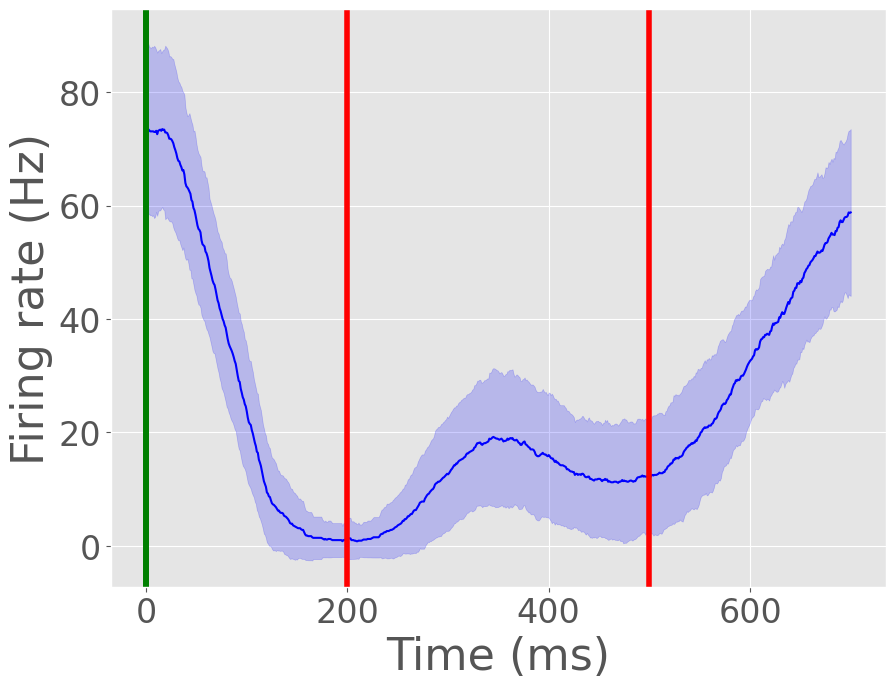

In [4]:
# Plot average firing rate
num_samples = 100
acq_potentials = np.array(pk.all_V[:acq_trials])
pre_CS_period = np.array(acq_potentials[-(num_samples + 1):-1])[:,-100:]
plot_potentials= np.concatenate((pre_CS_period,acq_potentials[-num_samples:]), axis=-1)[:,:800]
save_path = os.path.join(fig_save_dir, 'avg_fr_acq_double_pause.pdf')
plot_avg_fr(plot_potentials, pk.V_spike, [0.0], CS_onsets,
            US_onsets, save_path, bin_width=100)